### Loading Utils

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("/n/home12/binxuwang/Github/mini_edm")
sys.path.append("/n/home12/binxuwang/Github/DiffusionReasoning")

In [5]:
import os
from os.path import join
import pickle as pkl
import torch
from easydict import EasyDict as edict
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import einops

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.edgecolor'] = (1, 1, 1, 0)
plt.rcParams['figure.facecolor'] = (1, 1, 1, 0)
# vector graphics type
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [7]:
from train_edm import create_model, edm_sampler, EDM
from edm_utils import edm_sampler_inpaint, create_edm, get_default_config
from rule_utils import get_rule_img, get_obj_list, get_rule_list
from rule_utils import check_consistent
from dataset_utils import train_data2attr_tsr,load_raw_data,load_PGM_abstract

Checking rules of the final samples in the EDM

In [6]:
!ls /n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/mini_edm/exps/

base_cifar10_20240130-2317
base_cifar10_20240130-2318
base_gabor_prime_20240130-2251
base_gabor_sf_20240130-2306
base_mnist_20240129-1342
base_mnist_20240129-1406
base_mnist_20240130-2207
base_RAVEN10_20240131-2049
base_RAVEN10_abstract_20240201-0036
base_RAVEN10_abstract_onehot_20240201-0147
BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411
BigBlnr_RAVEN10_abstract_20240208-1709
BigBlnr_RAVEN10_abstract_onehot_20240209-0208
Big_RAVEN10_abstract_20240207-1925
Big_RAVEN10_abstract_onehot_20240207-1925
WideBlnr_RAVEN10_abstract_20240211-1747
WideBlnr_RAVEN10_abstract_onehot_20240211-1743
Wide_RAVEN10_abstract_20240206-2323
Wide_RAVEN10_abstract_onehot_20240206-2324


In [8]:
from edm_utils import parse_train_logfile

In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)

## Show Training Loss Dynamics

                timestamp level   step  learning_rate  average_loss  batch_loss
996   2024-02-01 01:37:50  INFO  99600         0.0002      0.874396    0.746673
997   2024-02-01 01:37:54  INFO  99700         0.0002      0.874347    0.742360
998   2024-02-01 01:37:57  INFO  99800         0.0002      0.874292    0.780893
999   2024-02-01 01:38:01  INFO  99900         0.0002      0.874254    0.824455
1000  2024-02-01 01:38:04  INFO  99999         0.0002      0.874195    0.758389


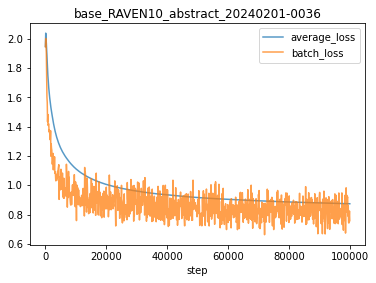

                timestamp level   step  learning_rate  average_loss  batch_loss
996   2024-02-01 02:49:45  INFO  99600         0.0002      0.328226    0.197677
997   2024-02-01 02:49:48  INFO  99700         0.0002      0.328127    0.198251
998   2024-02-01 02:49:52  INFO  99800         0.0002      0.328028    0.222092
999   2024-02-01 02:49:55  INFO  99900         0.0002      0.327931    0.231565
1000  2024-02-01 02:49:59  INFO  99999         0.0002      0.327830    0.215114


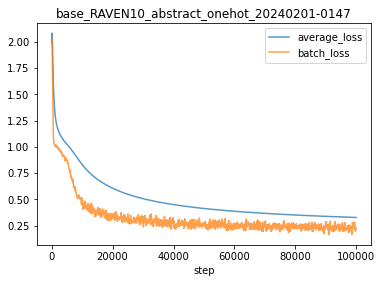

                 timestamp level    step  learning_rate  average_loss  batch_loss
9996   2024-02-13 07:51:27  INFO  999600         0.0002      0.796984    0.838021
9997   2024-02-13 07:51:30  INFO  999700         0.0002      0.796981    0.722801
9998   2024-02-13 07:51:34  INFO  999800         0.0002      0.796980    0.801322
9999   2024-02-13 07:51:37  INFO  999900         0.0002      0.796978    0.736317
10000  2024-02-13 07:51:41  INFO  999999         0.0002      0.796976    0.809345


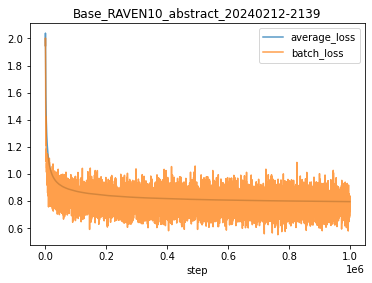

                 timestamp level    step  learning_rate  average_loss  batch_loss
9996   2024-02-13 08:06:04  INFO  999600         0.0002      0.205747    0.185162
9997   2024-02-13 08:06:07  INFO  999700         0.0002      0.205744    0.165161
9998   2024-02-13 08:06:11  INFO  999800         0.0002      0.205741    0.192655
9999   2024-02-13 08:06:14  INFO  999900         0.0002      0.205739    0.157810
10000  2024-02-13 08:06:18  INFO  999999         0.0002      0.205737    0.209327


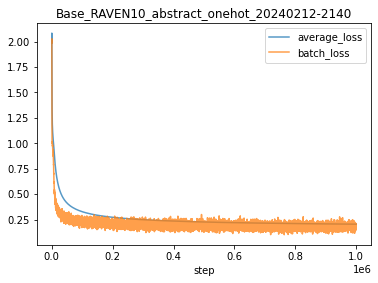

                 timestamp level    step  learning_rate  average_loss  batch_loss
9996   2024-02-13 10:12:22  INFO  999600         0.0002      0.795976    0.834915
9997   2024-02-13 10:12:26  INFO  999700         0.0002      0.795973    0.724018
9998   2024-02-13 10:12:29  INFO  999800         0.0002      0.795972    0.801498
9999   2024-02-13 10:12:33  INFO  999900         0.0002      0.795969    0.729822
10000  2024-02-13 10:12:36  INFO  999999         0.0002      0.795967    0.803952


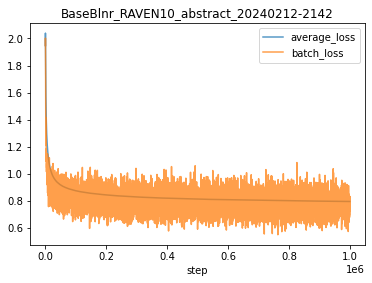

                 timestamp level    step  learning_rate  average_loss  batch_loss
9996   2024-02-13 10:28:49  INFO  999600         0.0002      0.204157    0.181447
9997   2024-02-13 10:28:52  INFO  999700         0.0002      0.204154    0.160258
9998   2024-02-13 10:28:56  INFO  999800         0.0002      0.204151    0.188173
9999   2024-02-13 10:28:59  INFO  999900         0.0002      0.204148    0.153567
10000  2024-02-13 10:29:03  INFO  999999         0.0002      0.204146    0.201313


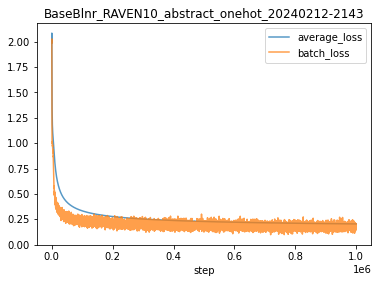

                 timestamp level    step  learning_rate  average_loss  batch_loss
9996   2024-02-07 16:34:03  INFO  999600         0.0002      0.761705    0.742915
9997   2024-02-07 16:34:08  INFO  999700         0.0002      0.761703    0.617068
9998   2024-02-07 16:34:14  INFO  999800         0.0002      0.761701    0.765328
9999   2024-02-07 16:34:20  INFO  999900         0.0002      0.761697    0.685548
10000  2024-02-07 16:34:25  INFO  999999         0.0002      0.761695    0.745053


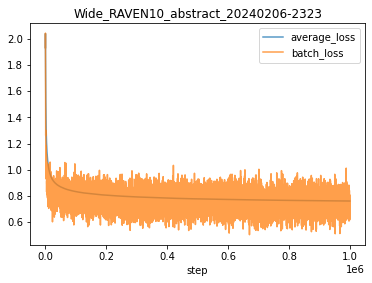

                 timestamp level    step  learning_rate  average_loss  batch_loss
9996   2024-02-07 16:25:38  INFO  999600         0.0002      0.163831    0.151055
9997   2024-02-07 16:25:43  INFO  999700         0.0002      0.163830    0.114658
9998   2024-02-07 16:25:49  INFO  999800         0.0002      0.163829    0.153829
9999   2024-02-07 16:25:55  INFO  999900         0.0002      0.163827    0.120746
10000  2024-02-07 16:26:00  INFO  999999         0.0002      0.163826    0.143744


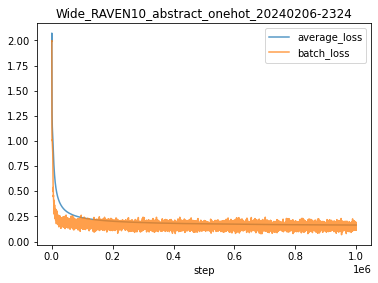

                 timestamp level    step  learning_rate  average_loss  batch_loss
9996   2024-02-12 16:55:01  INFO  999600         0.0002      0.761472    0.739816
9997   2024-02-12 16:55:07  INFO  999700         0.0002      0.761469    0.617000
9998   2024-02-12 16:55:13  INFO  999800         0.0002      0.761468    0.772134
9999   2024-02-12 16:55:19  INFO  999900         0.0002      0.761464    0.687484
10000  2024-02-12 16:55:25  INFO  999999         0.0002      0.761462    0.745697


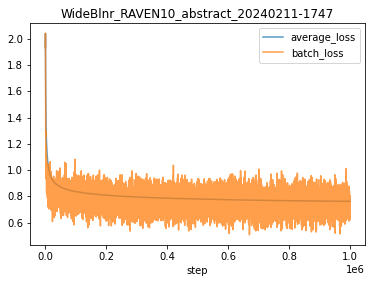

                 timestamp level    step  learning_rate  average_loss  batch_loss
9996   2024-02-12 17:12:37  INFO  999600         0.0002      0.163463    0.151702
9997   2024-02-12 17:12:43  INFO  999700         0.0002      0.163462    0.116792
9998   2024-02-12 17:12:49  INFO  999800         0.0002      0.163460    0.151231
9999   2024-02-12 17:12:55  INFO  999900         0.0002      0.163459    0.122381
10000  2024-02-12 17:13:01  INFO  999999         0.0002      0.163457    0.143751


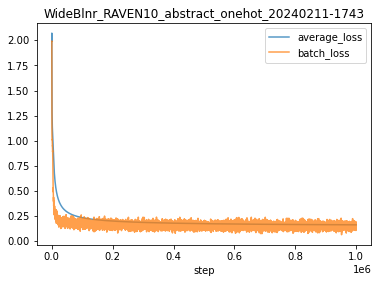

                 timestamp level    step  learning_rate  average_loss  batch_loss
9996   2024-02-10 10:24:33  INFO  999600         0.0002      0.744294    0.728430
9997   2024-02-10 10:24:44  INFO  999700         0.0002      0.744292    0.656051
9998   2024-02-10 10:24:55  INFO  999800         0.0002      0.744290    0.699412
9999   2024-02-10 10:25:06  INFO  999900         0.0002      0.744289    0.657995
10000  2024-02-10 10:25:17  INFO  999999         0.0002      0.744287    0.662654


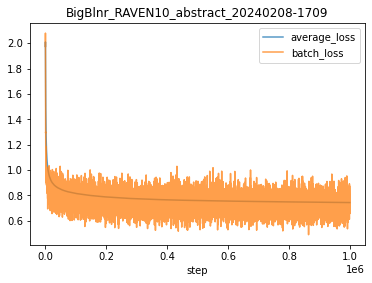

                timestamp level    step  learning_rate  average_loss  batch_loss
9301  2024-02-11 04:52:32  INFO  930100         0.0001      0.160171    0.174490
9302  2024-02-11 04:52:43  INFO  930200         0.0001      0.160169    0.162836
9303  2024-02-11 04:52:55  INFO  930300         0.0001      0.160168    0.153912
9304  2024-02-11 04:53:06  INFO  930400         0.0001      0.160166    0.175756
9305  2024-02-11 04:53:17  INFO  930500         0.0001      0.160164    0.128869


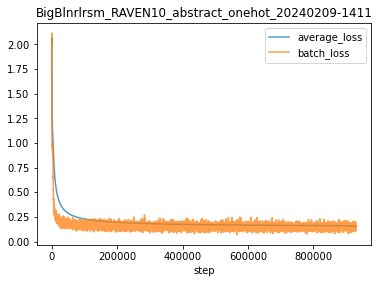

In [10]:
exproot = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/mini_edm/exps/"
for expname in ["base_RAVEN10_abstract_20240201-0036",
                "base_RAVEN10_abstract_onehot_20240201-0147",
                "Base_RAVEN10_abstract_20240212-2139",
                "Base_RAVEN10_abstract_onehot_20240212-2140",
                "BaseBlnr_RAVEN10_abstract_20240212-2142",
                "BaseBlnr_RAVEN10_abstract_onehot_20240212-2143",
                "Wide_RAVEN10_abstract_20240206-2323",
                "Wide_RAVEN10_abstract_onehot_20240206-2324",
                "WideBlnr_RAVEN10_abstract_20240211-1747",
                "WideBlnr_RAVEN10_abstract_onehot_20240211-1743",
                # "Big_RAVEN10_abstract_20240207-1925",
                # "Big_RAVEN10_abstract_onehot_20240207-1925",
                "BigBlnr_RAVEN10_abstract_20240208-1709",
                # "BigBlnr_RAVEN10_abstract_onehot_20240209-0208",]:
                "BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411",]:
    expdir = join(exproot, expname)
    df = parse_train_logfile(join(expdir, "std.log"))
    # df.tail()
    df.plot(x="step", y=["average_loss","batch_loss"], alpha=0.75) 
    plt.title(expname)
    plt.show()

### All obsolete

In [2]:
exproot = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/mini_edm/exps/"
for expname in ["base_RAVEN10_abstract_20240201-0036",
                "base_RAVEN10_abstract_onehot_20240201-0147",
                "Base_RAVEN10_abstract_20240212-2139",
                "Base_RAVEN10_abstract_onehot_20240212-2140",
                "BaseBlnr_RAVEN10_abstract_20240212-2142",
                "BaseBlnr_RAVEN10_abstract_onehot_20240212-2143",
                "Wide_RAVEN10_abstract_20240206-2323",
                "Wide_RAVEN10_abstract_onehot_20240206-2324",
                "WideBlnr_RAVEN10_abstract_20240211-1747",
                "WideBlnr_RAVEN10_abstract_onehot_20240211-1743",
                "Big_RAVEN10_abstract_20240207-1925",
                "Big_RAVEN10_abstract_onehot_20240207-1925",
                "BigBlnr_RAVEN10_abstract_20240208-1709",
                "BigBlnr_RAVEN10_abstract_onehot_20240209-0208",
                "BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411",]:
    expdir = join(exproot, expname)
    df = parse_train_logfile(join(expdir, "std.log"))
    # df.tail()
    df.plot(x="step", y=["average_loss","batch_loss"], alpha=0.75) 
    plt.title(expname)
    plt.show()

NameError: name 'join' is not defined

## Sample Rule Consistency

In [11]:
from stats_plot_utils import visualize_consistency, visualize_rule_validity

/n/home12/binxuwang/Github/DiffusionReasoning/stats_plot_utils.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(6,4.5))


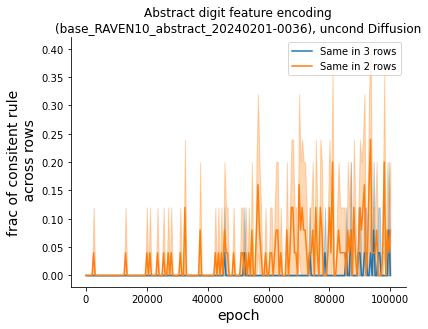

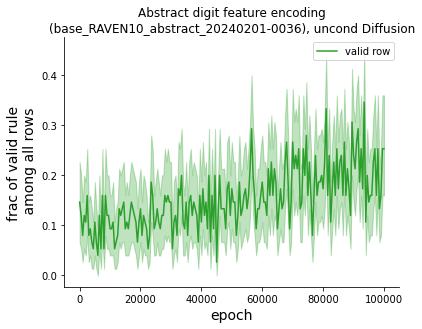

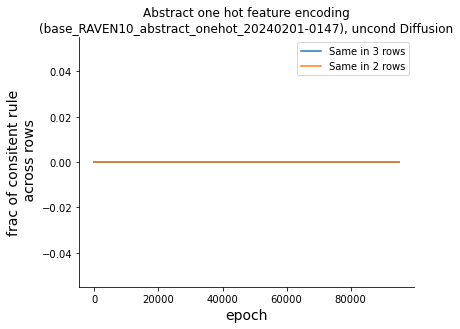

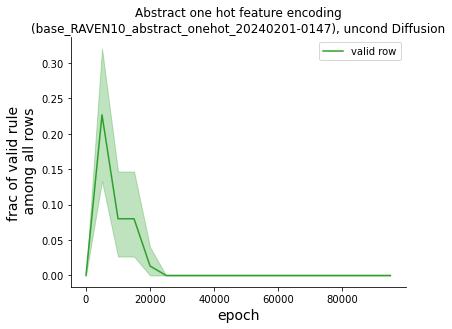

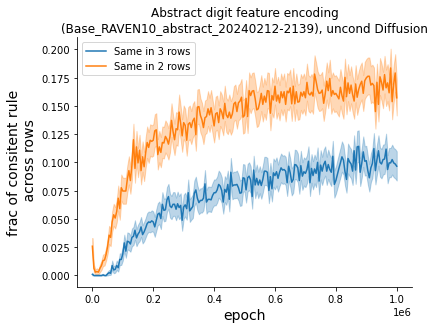

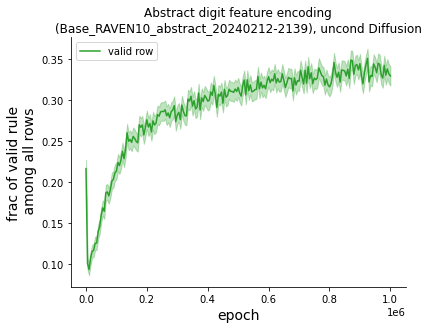

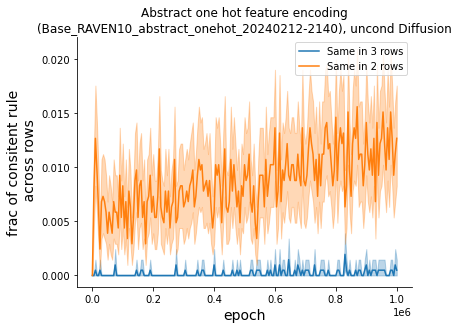

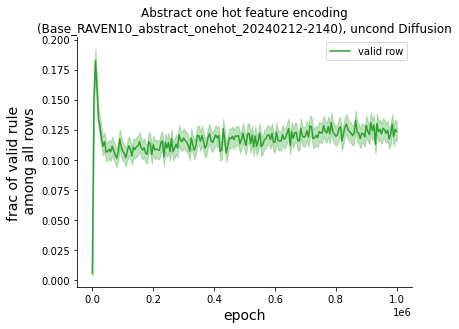

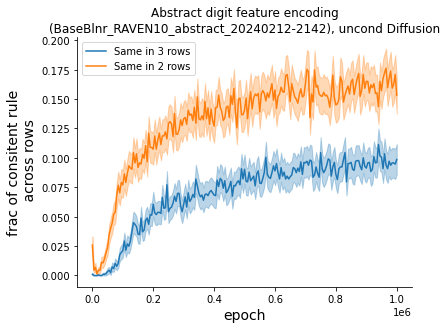

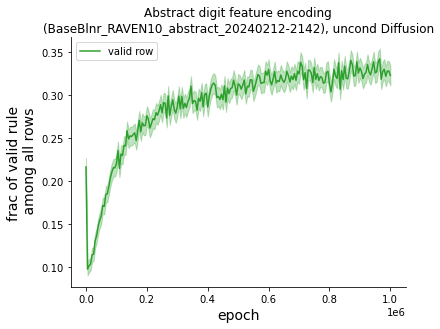

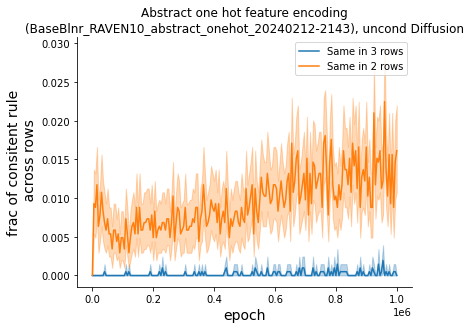

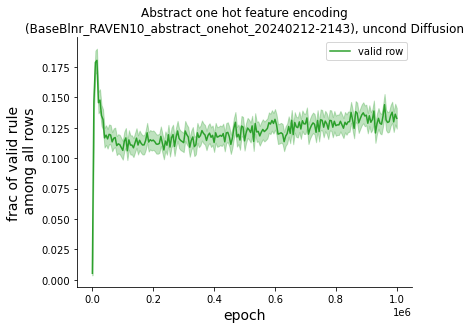

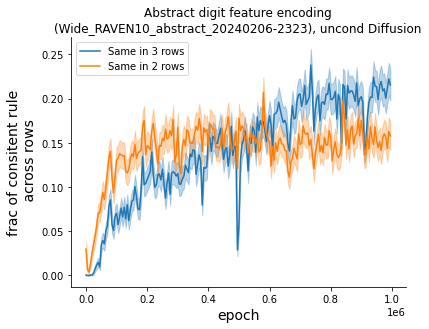

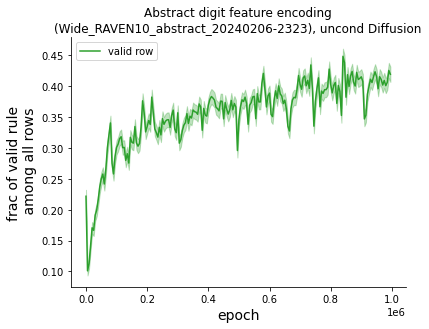

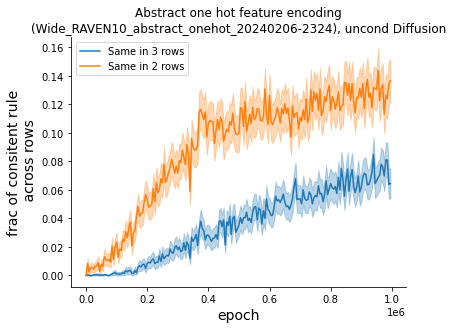

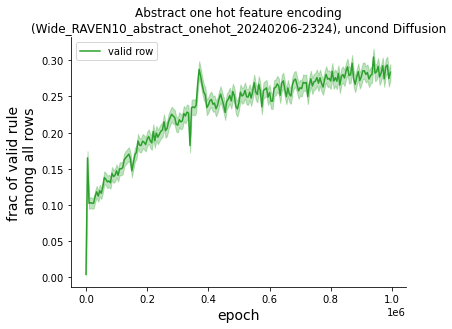

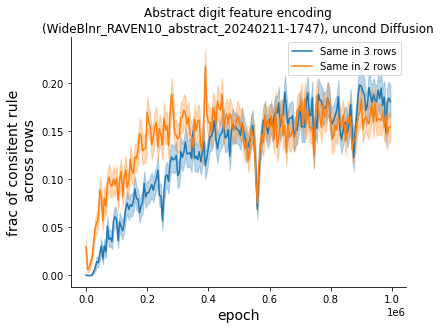

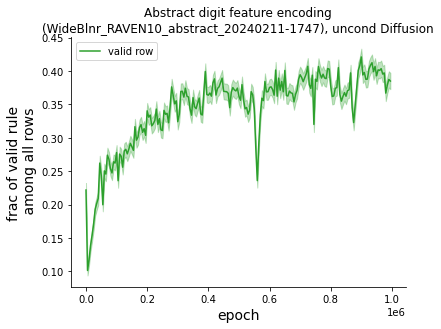

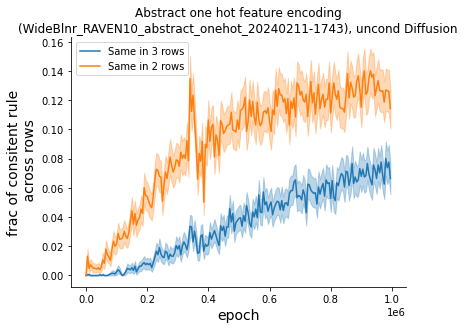

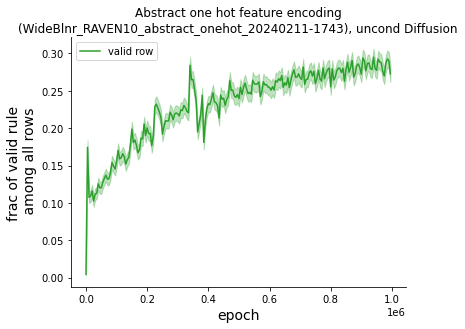

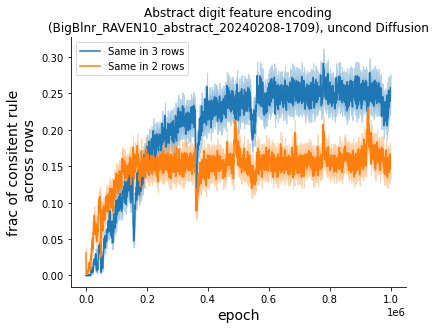

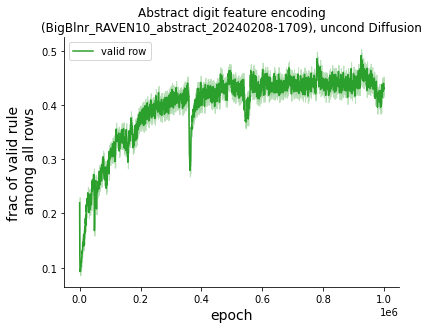

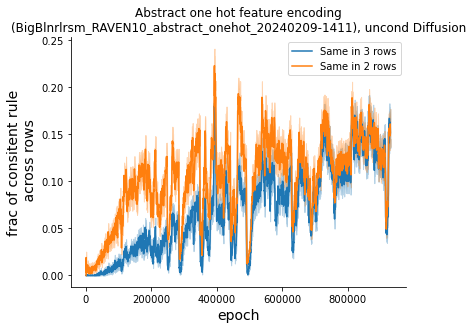

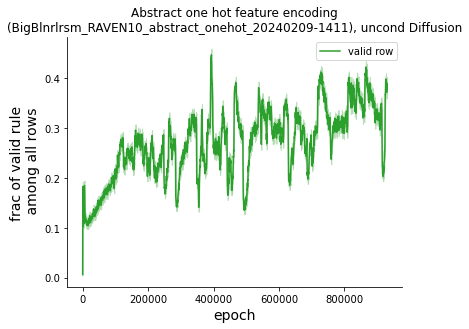

In [12]:
exproot = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/mini_edm/exps/"
for expname in ["base_RAVEN10_abstract_20240201-0036",
                "base_RAVEN10_abstract_onehot_20240201-0147",
                "Base_RAVEN10_abstract_20240212-2139",
                "Base_RAVEN10_abstract_onehot_20240212-2140",
                "BaseBlnr_RAVEN10_abstract_20240212-2142",
                "BaseBlnr_RAVEN10_abstract_onehot_20240212-2143",
                "Wide_RAVEN10_abstract_20240206-2323",
                "Wide_RAVEN10_abstract_onehot_20240206-2324",
                "WideBlnr_RAVEN10_abstract_20240211-1747",
                "WideBlnr_RAVEN10_abstract_onehot_20240211-1743",
                # "Big_RAVEN10_abstract_20240207-1925",
                # "Big_RAVEN10_abstract_onehot_20240207-1925",
                "BigBlnr_RAVEN10_abstract_20240208-1709",
                # "BigBlnr_RAVEN10_abstract_onehot_20240209-0208",]:
                "BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411",]:
    expdir = join(exproot, expname)
    data = np.load(join(expdir, "samples_inferred_rule_consistency.npz"))
    consistent_mat = data["consistent_mat"]
    rules_all = data["rules_all"]
    epoch_list = data["epoch_list"]
    is_onehot = "onehot" in expname
    encoding = 'one hot' if is_onehot else 'digit'
    # plt.imshow(consistent_mat)
    visualize_consistency(epoch_list, consistent_mat, 
                      title_str=f"Abstract {encoding} feature encoding\n({expname})", 
                      savefig=False,)
                      # figname="RAVEN10_abstract_onehot_base",)
    visualize_rule_validity(epoch_list, rules_all, 
                            title_str=f"Abstract {encoding} feature encoding\n({expname})", 
                            savefig=False,)
                            # figname="RAVEN10_abstract_onehot_base",);

## Summarizing Consistency Figure / Table 

In [27]:
df_col = []
for expname in ["base_RAVEN10_abstract_20240201-0036",
                "base_RAVEN10_abstract_onehot_20240201-0147",
                "Base_RAVEN10_abstract_20240212-2139",
                "Base_RAVEN10_abstract_onehot_20240212-2140",
                "BaseBlnr_RAVEN10_abstract_20240212-2142",
                "BaseBlnr_RAVEN10_abstract_onehot_20240212-2143",
                "Wide_RAVEN10_abstract_20240206-2323",
                "Wide_RAVEN10_abstract_onehot_20240206-2324",
                "WideBlnr_RAVEN10_abstract_20240211-1747",
                "WideBlnr_RAVEN10_abstract_onehot_20240211-1743",
                # "Big_RAVEN10_abstract_20240207-1925",
                # "Big_RAVEN10_abstract_onehot_20240207-1925",
                "BigBlnr_RAVEN10_abstract_20240208-1709",
                # "BigBlnr_RAVEN10_abstract_onehot_20240209-0208",]:
                "BigBlnrlrsm_RAVEN10_abstract_onehot_20240209-1411",]:
    expdir = join(exproot, expname)
    data = np.load(join(expdir, "samples_inferred_rule_consistency.npz"))
    consistent_mat = data["consistent_mat"]
    rules_all = data["rules_all"]
    epoch_list = data["epoch_list"]
    is_onehot = "onehot" in expname
    expname_prefix = expname.split("_")[0]
    encoding = 'onehot' if is_onehot else 'digit'
    df_col.append({"model_prefix":expname_prefix, "encoding":encoding,
                    "epoch":epoch_list[-1], 
                    "sample_num":consistent_mat.shape[1],
                    "3_same_rule":(consistent_mat[-1]==1).mean(), 
                    "2_same_rule":(consistent_mat[-1]==2).mean(), 
                    # "mismatch_rule":(consistent_mat[-1]==3).mean(), 
                    "valid_row":(rules_all[-1]!=-1).mean(),
                    })
df_syn = pd.DataFrame(df_col)

In [28]:
pd.pivot_table(df_syn, index="model_prefix", columns="encoding", 
             values=["3_same_rule","2_same_rule","valid_row"],
             sort=False) #,

3_same_rule           2_same_rule           valid_row          
encoding           digit    onehot       digit    onehot     digit    onehot
model_prefix                                                                
base            0.000000  0.000000    0.080000  0.000000  0.253333  0.000000
Base            0.096680  0.000488    0.157227  0.012695  0.329102  0.123372
BaseBlnr        0.098633  0.000000    0.153320  0.016113  0.322754  0.132812
Wide            0.215332  0.064453    0.157715  0.136719  0.419108  0.283529
WideBlnr        0.180176  0.066406    0.154297  0.114258  0.384928  0.272949
BigBlnr         0.257324       NaN    0.147949       NaN  0.430827       NaN
BigBlnrlrsm          NaN  0.150879         NaN  0.152344       NaN  0.378092

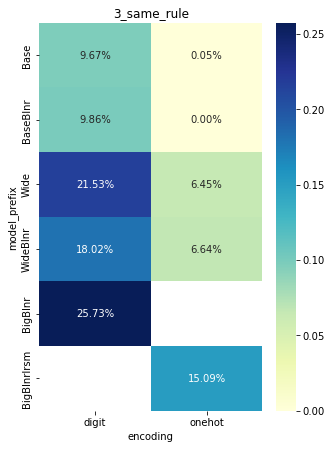

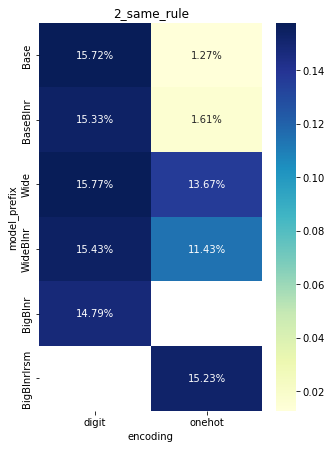

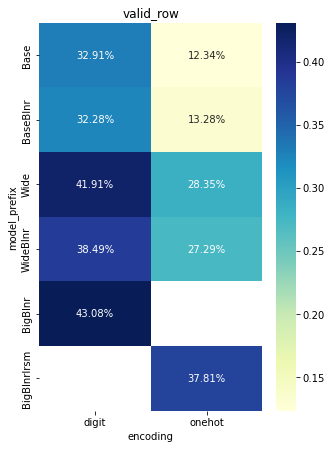

In [29]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
for valkey in ["3_same_rule","2_same_rule","valid_row"]:
    plt.figure(figsize=(5, 7))
    sns.heatmap(pd.pivot_table(df_syn[df_syn.model_prefix != "base"], index="model_prefix", columns="encoding", 
             values=valkey,
             sort=False) , 
                annot=True, cmap="YlGnBu", fmt=".2%")
    plt.title(valkey)
    # plt.axis('equal')
    plt.show()

## Are there any special rules that were learned preferably?

In [79]:
rules_uniq, rules_cnt = np.unique(rules_all[-1], return_counts=True)
pd.DataFrame({"rule":rules_uniq, "count":rules_cnt}).sort_values("count", ascending=False)

,rule,count
0,-1,3821
5,4,256
2,1,202
4,3,199
21,24,190
18,21,153
9,11,134
12,14,134
20,23,130
19,22,129


In [62]:
rules_cnt_mat = np.zeros((len(rules_all), 41), dtype=int)
for igen in range(len(rules_all)):
    rules_uniq, rules_cnt = np.unique(rules_all[igen], return_counts=True)
    assert min(rules_uniq) == -1
    rules_cnt_mat[igen, 1 + rules_uniq] = rules_cnt

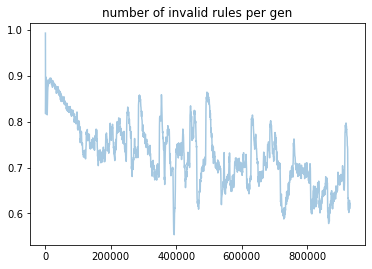

In [71]:
plt.plot(epoch_list, rules_cnt_mat[:, 0] / 2048 /3, alpha=0.4)
plt.title("proportion of invalid rules per gen")
plt.show()

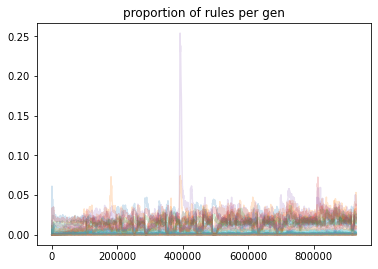

In [73]:
plt.plot(epoch_list,rules_cnt_mat[:, 1:] / 2048 /3, alpha=0.2)
plt.title("proportion of rules per gen")
plt.show()

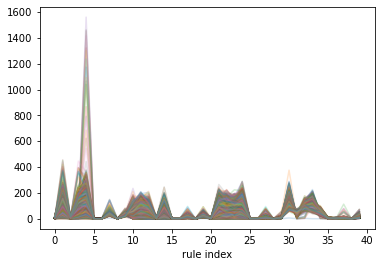

In [74]:
plt.plot(rules_cnt_mat[:, 1:].T, alpha=0.2)
plt.xlabel("rule index")
plt.show()

In [44]:
(rules_all[-1]!=-1).mean()

0.3780924479166667

In [46]:
(consistent_mat[-1]==1).mean()

0.15087890625

In [42]:
(consistent_mat[-1]==2).mean()

0.15234375